## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [30]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 


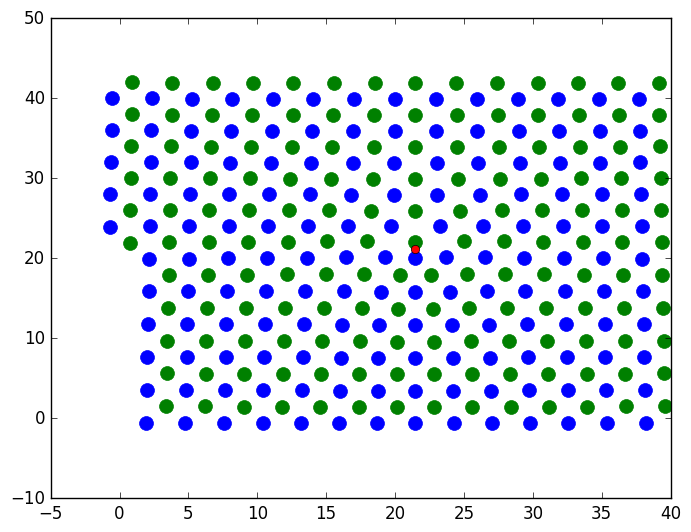

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x335106f90>

In [31]:
# isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
at, xcore = MaterialsScienceTools.Dislocations.fcc_edge_geom("Al", 5.1, truncate=false, cle=:isotropic, ν=0.25)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=20)
plot(x[I1], y[I1], "g.", markersize=20)
plot([xcore[1]], [xcore[2]], "ro")

In [32]:
# next we need to check the implementation of the elastic constants 
reload("MaterialsScienceTools")
El = MaterialsScienceTools.Elasticity
Dis = MaterialsScienceTools.Dislocations
;

In [33]:
# first try the standard cubic cell : 
# this looks like a valid cubic symmetry tensor ✓
atu = set_pbc!(bulk("Al", cubic=true) * 2, true)
set_calculator!(atu, lennardjones(r0=rnn("Al")))
set_constraint!(atu, VariableCell(atu))
# JuLIP.Solve.minimise!(atu);\
C = El.elastic_moduli(atu)
Cvoigt = round(El.voigt_moduli(atu), 3)
Cvoigt

6×6 Array{Float64,2}:
  6.48    3.228   3.228  -0.0     0.001   0.001
  3.228   6.481   3.228   0.001  -0.0     0.002
  3.228   3.228   6.482   0.002   0.002  -0.0  
 -0.0     0.001   0.002   4.214  -0.0    -0.0  
  0.001  -0.0     0.002  -0.0     4.214  -0.0  
  0.001   0.002  -0.0    -0.0    -0.0     4.214

In [34]:
# check how far we are from anisotropy: pretty far actually 
println((Cvoigt[1,1] - Cvoigt[1,2]) / 2)
println("for isotropy, this number should match Cvoigt[6,6] = ", Cvoigt[6,6])

1.6260000000000001
for isotropy, this number should match Cvoigt[6,6] = 4.214


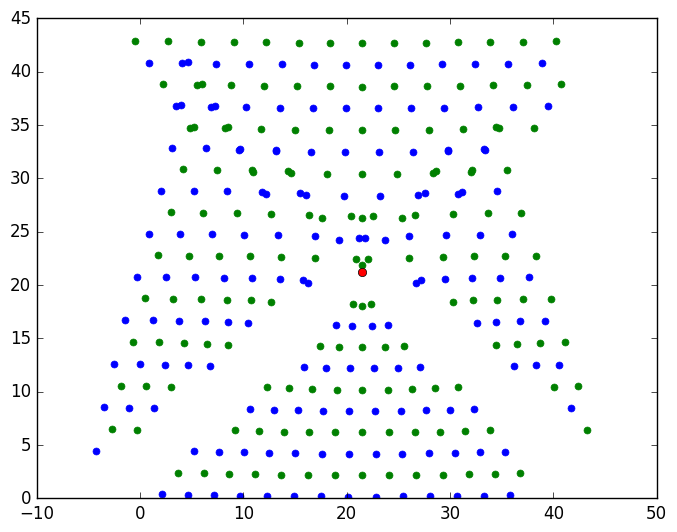

(λ,ϕ) = (1.0875788292636692,0.9521358526887806)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x33558e590>

In [36]:
reload("MaterialsScienceTools")
Dis = MaterialsScienceTools.Dislocations
calc = lennardjones(r0=rnn("Al"))
at, xcore = Dis.fcc_edge_geom("Al", 5.1, truncate=false, cle=:anisotropic, calc=calc, TOL=1e-4)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=10)
plot(x[I1], y[I1], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")

In [72]:
reload("MaterialsScienceTools")
Cv = copy(Cvoigt)
Cv[2,2] = Cv[3,3] = Cv[1,1]
Cv[1,3] = Cv[2,3] = Cv[1,2]
Cv[4,4] = Cv[5,5] = Cv[6,6] = (Cv[1,1] - Cv[1,2])/2

1.6260000000000001

In [66]:
MaterialsScienceTools.Dislocations.u_edge([], [], 1.0, Cv)

(λ,ϕ) = (1.0,1.5707963162581844)


In [67]:
pi/2

1.5707963267948966

In [12]:
p = rand()
a = [ C[i,1,k,1] + (C[i,1,k,2] + C[i,2,k,1]) * p + C[i,2,k,2] * p^2
         for i=1:3, k=1:3 ]

3×3 Array{Float64,2}:
 9.83907      6.64511      5.56395e-5
 6.64534      9.38213     -1.08908e-5
 0.000144317  7.76698e-5   7.57283   

In [13]:
using Calculus

In [14]:
# implements HL (13-85)
function det_aik(p, C)
  a = [ C[i,1,k,1] + (C[i,1,k,2] + C[i,2,k,1]) * p + C[i,2,k,2] * p^2
        for i=1:3, k=1:3 ]
  return det(a)
end


det_aik (generic function with 1 method)

In [15]:
f(p) = det_aik(p, C) 

f (generic function with 1 method)

In [22]:
f(0.0)

114.9866779167115

In [26]:
f'(0.0), f''(0.0), f'''(0.0), f''''(0.0)

(0.020041956999234573,266.81756560132254,-64.00000001558816,-7.926737849849202e6)